In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:/Users/nsshr/Downloads/survey.csv")

Exploratory Data Analysis

In [5]:
# Display the first few rows
print(data.head())

# Display data info
print(data.info())

# Check for missing values
print(data.isnull().sum())

   index        Timestamp  Age  Gender         Country state self_employed  \
0      0  8/27/2014 11:29   37  Female   United States    IL           NaN   
1      1  8/27/2014 11:29   44       M   United States    IN           NaN   
2      2  8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3      3  8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4      4  8/27/2014 11:30   31    Male   United States    TX           NaN   

  family_history treatment work_interfere  ...               leave  \
0             No       Yes          Often  ...       Somewhat easy   
1             No        No         Rarely  ...          Don't know   
2             No        No         Rarely  ...  Somewhat difficult   
3            Yes       Yes          Often  ...  Somewhat difficult   
4             No        No          Never  ...          Don't know   

  mental_health_consequence phys_health_consequence     coworkers supervisor  \
0                        No   

In [6]:
!pip install wordcloud

In [8]:
# Summary statistics
print(data.describe(include='all'))

              index        Timestamp           Age Gender        Country  \
count   1259.000000             1259  1.259000e+03   1259           1259   
unique          NaN              884           NaN     49             48   
top             NaN  8/27/2014 12:31           NaN   Male  United States   
freq            NaN                8           NaN    615            751   
mean     629.000000              NaN  7.942815e+07    NaN            NaN   
std      363.586303              NaN  2.818299e+09    NaN            NaN   
min        0.000000              NaN -1.726000e+03    NaN            NaN   
25%      314.500000              NaN  2.700000e+01    NaN            NaN   
50%      629.000000              NaN  3.100000e+01    NaN            NaN   
75%      943.500000              NaN  3.600000e+01    NaN            NaN   
max     1258.000000              NaN  1.000000e+11    NaN            NaN   

       state self_employed family_history treatment work_interfere  ...  \
count    744

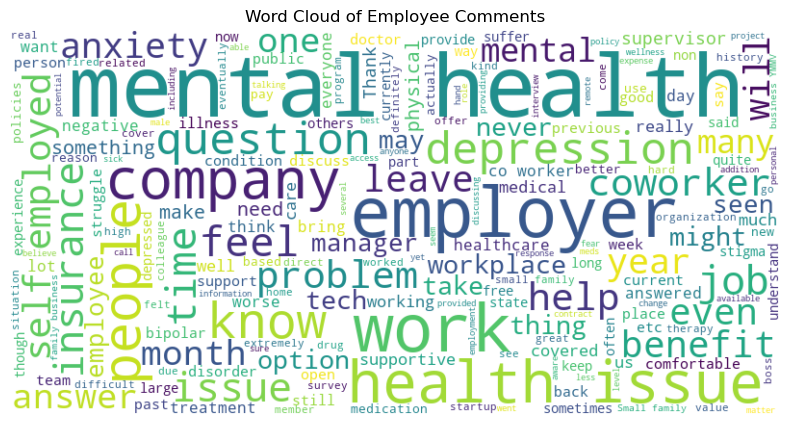

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract comments
comments = data['comments'].dropna().tolist()

# Combine all comments into a single string
comments_text = ' '.join(comments)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Comments')
plt.show()

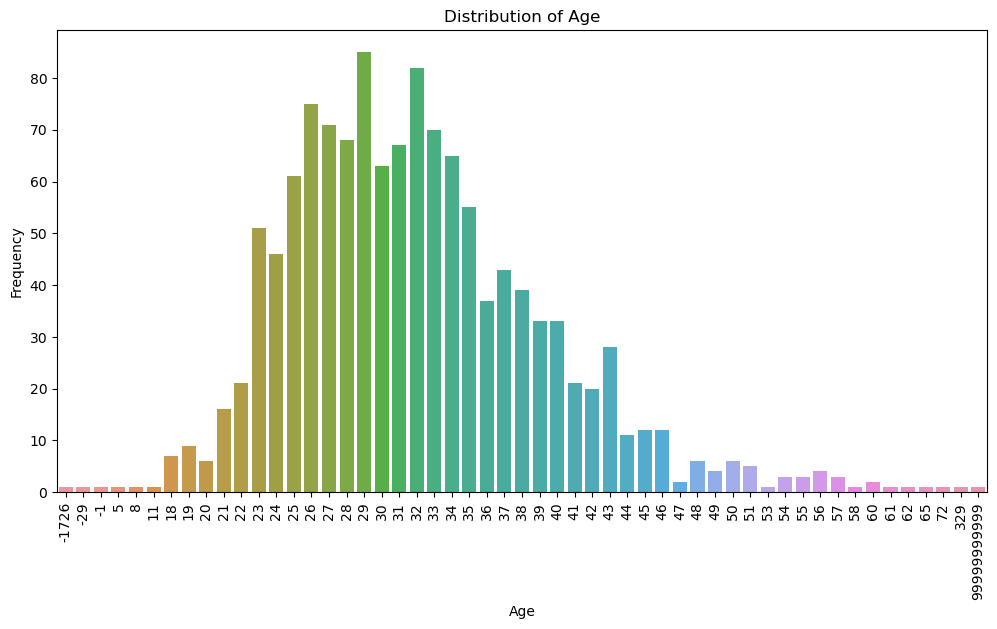

In [14]:
# Create a bar plot for the distribution of Age with exact age values
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Age', order=sorted(data['Age'].unique()))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

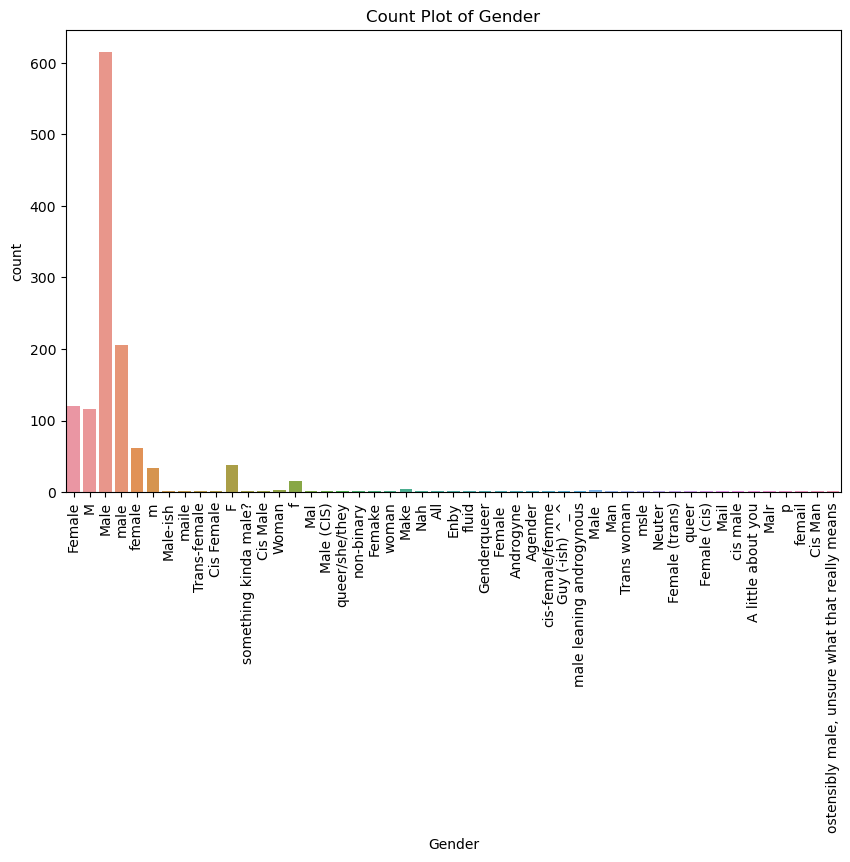

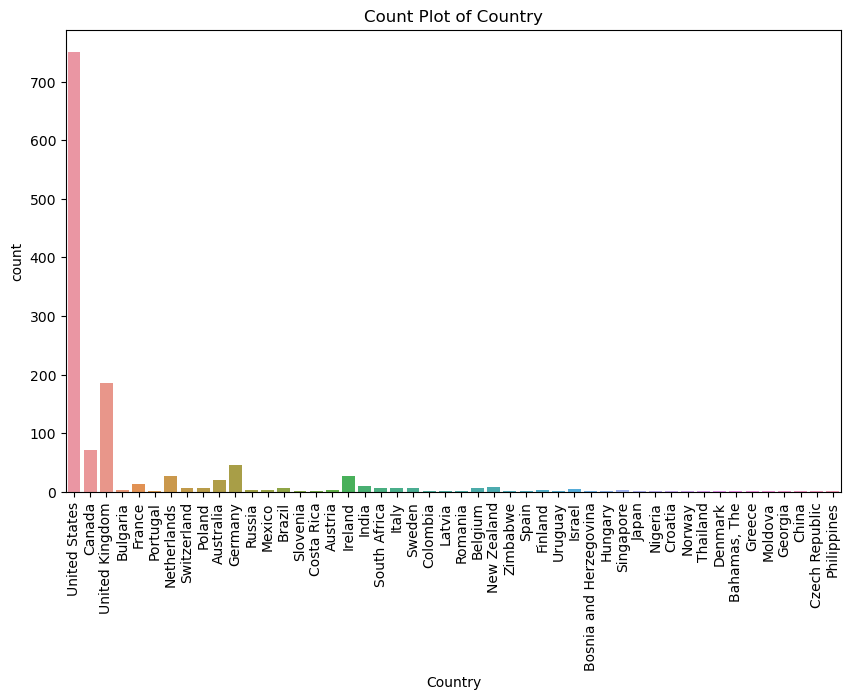

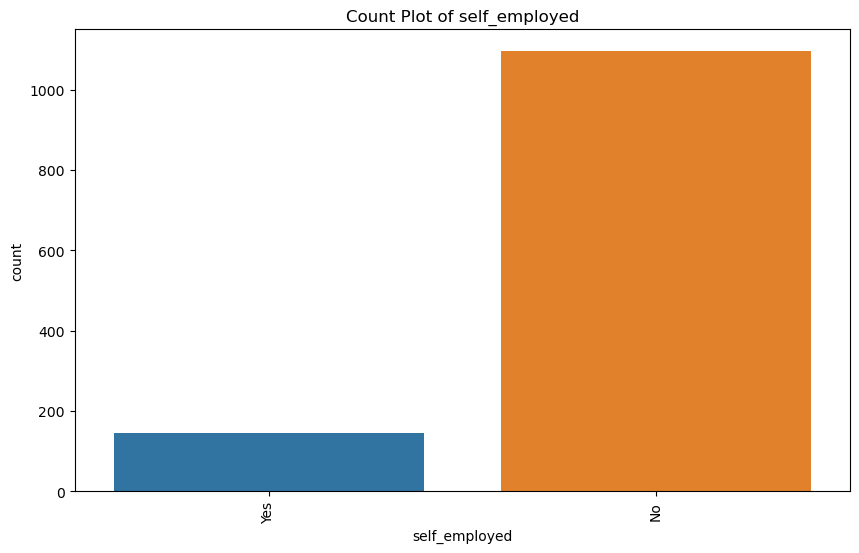

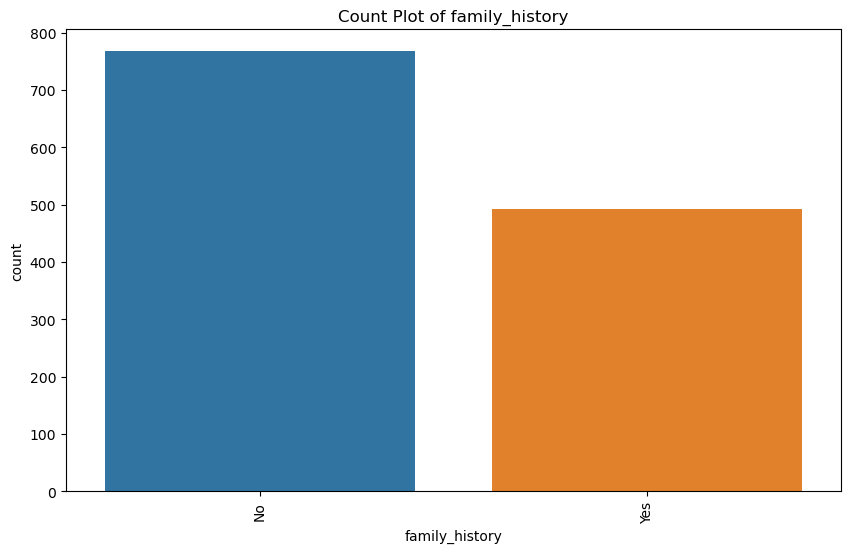

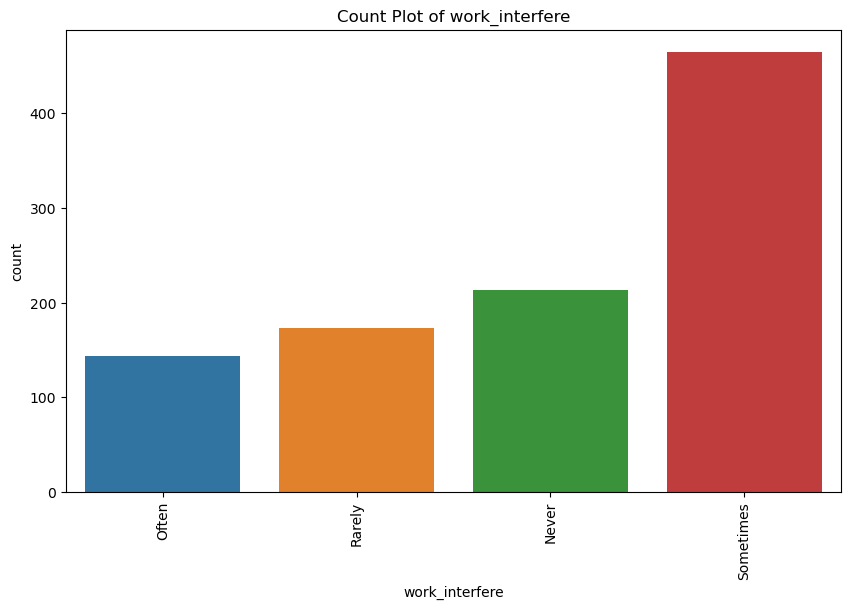

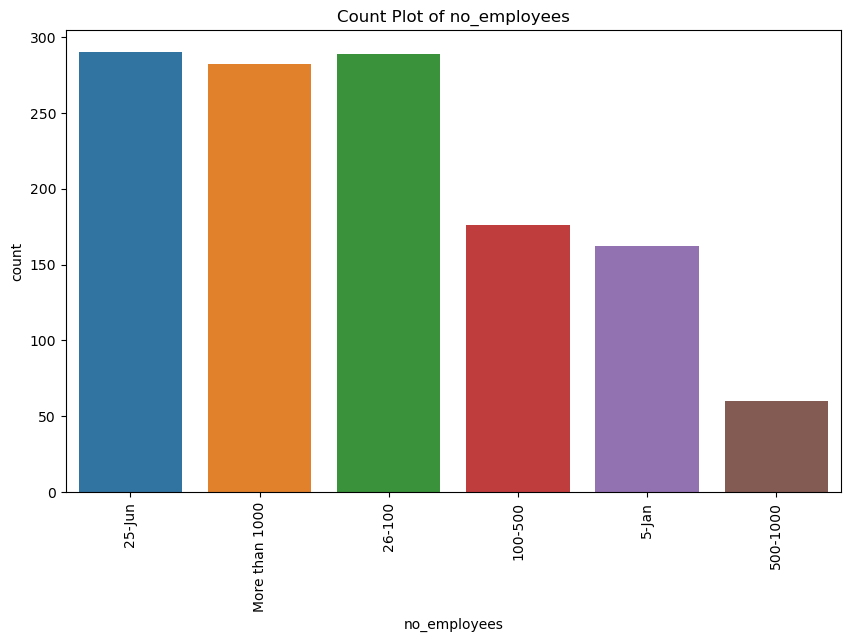

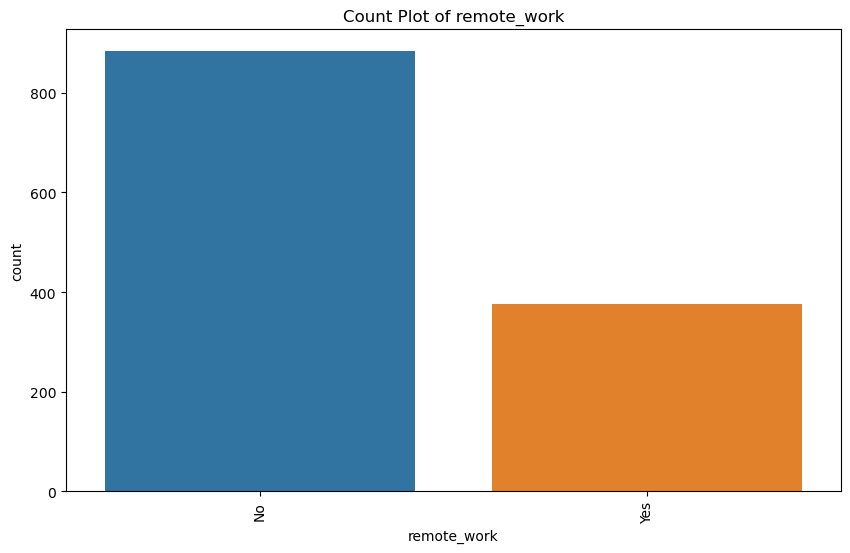

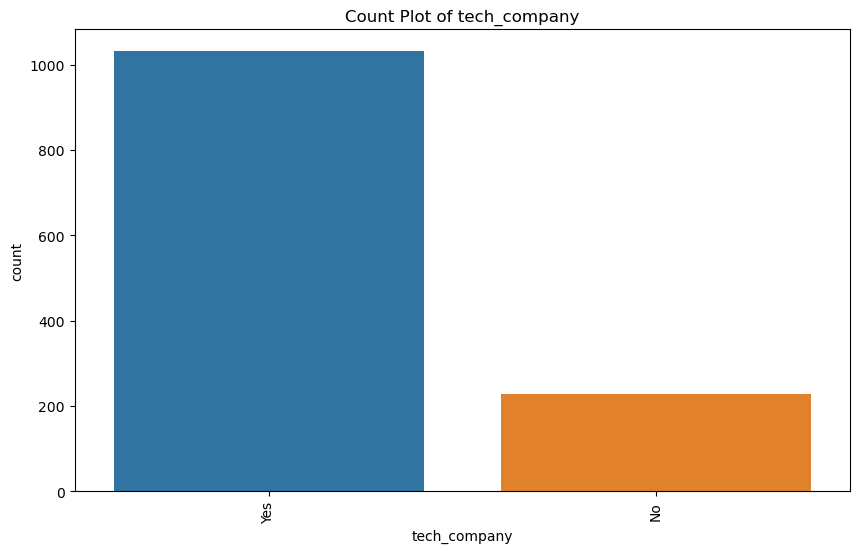

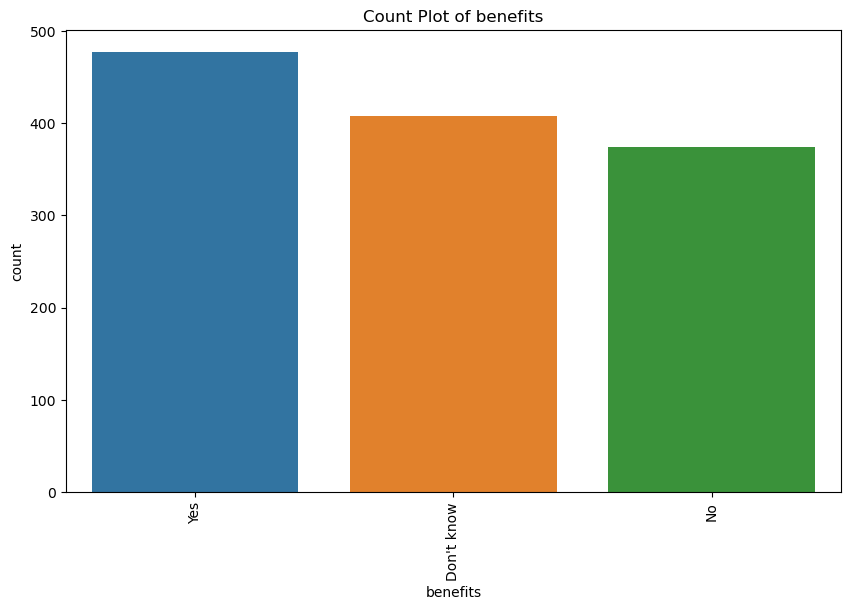

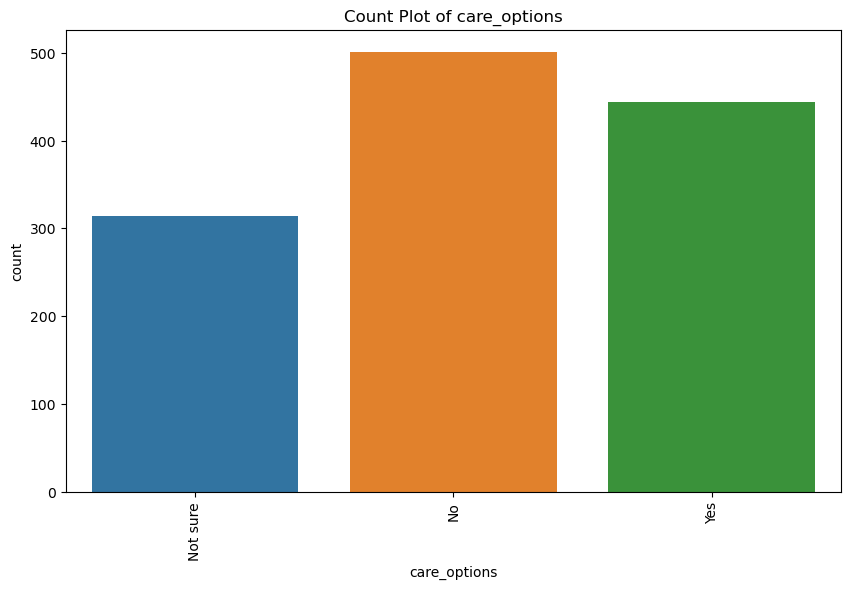

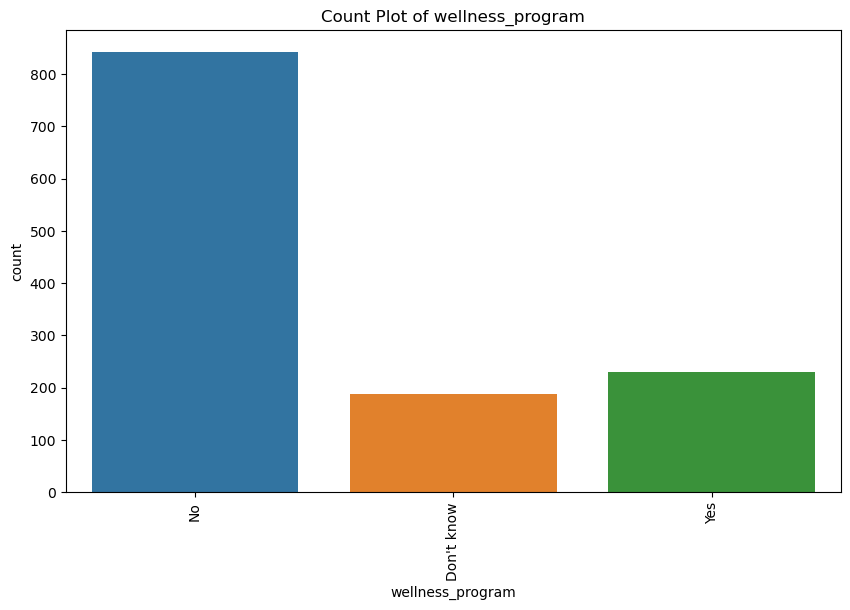

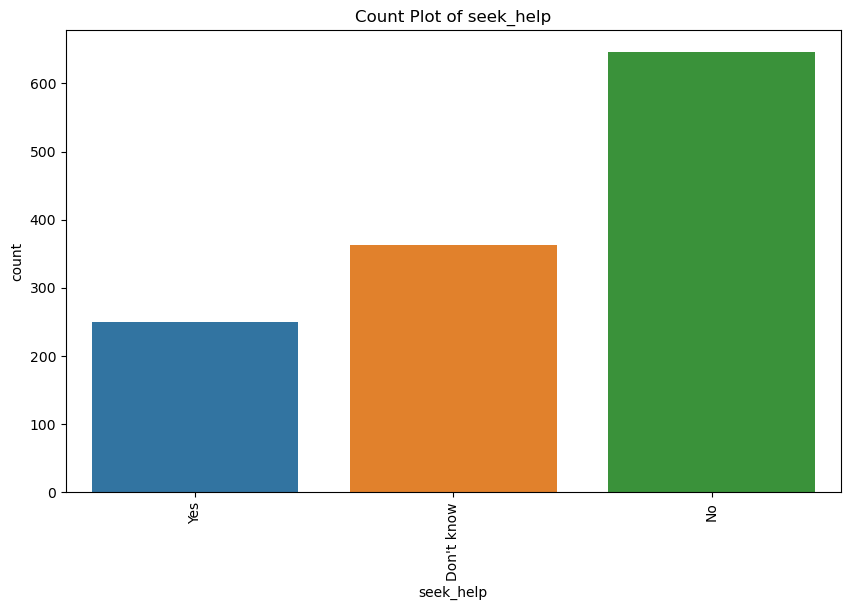

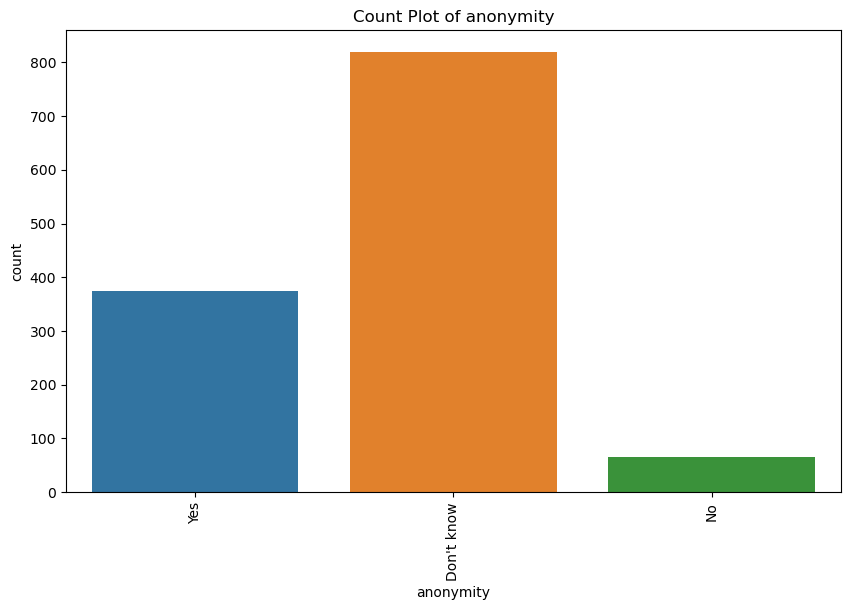

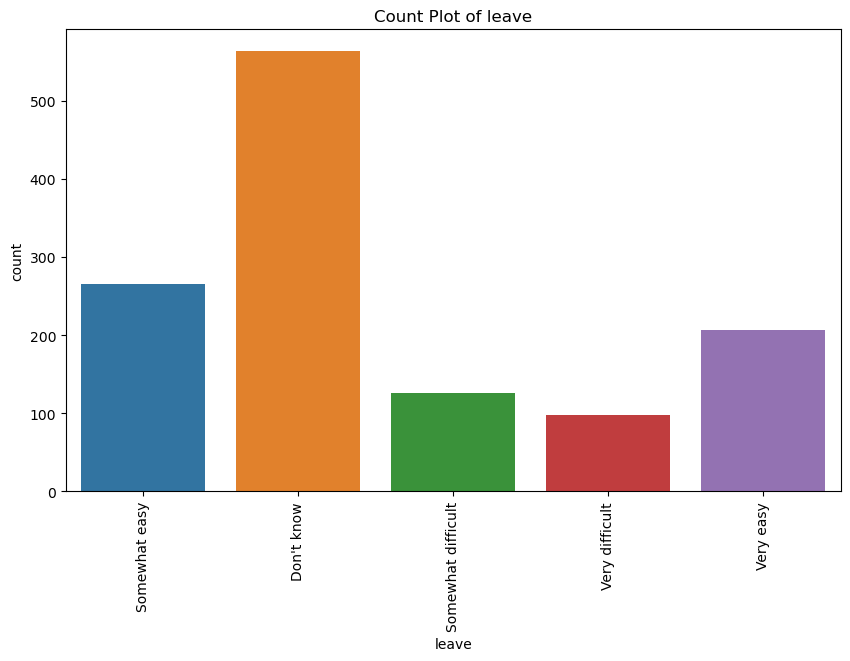

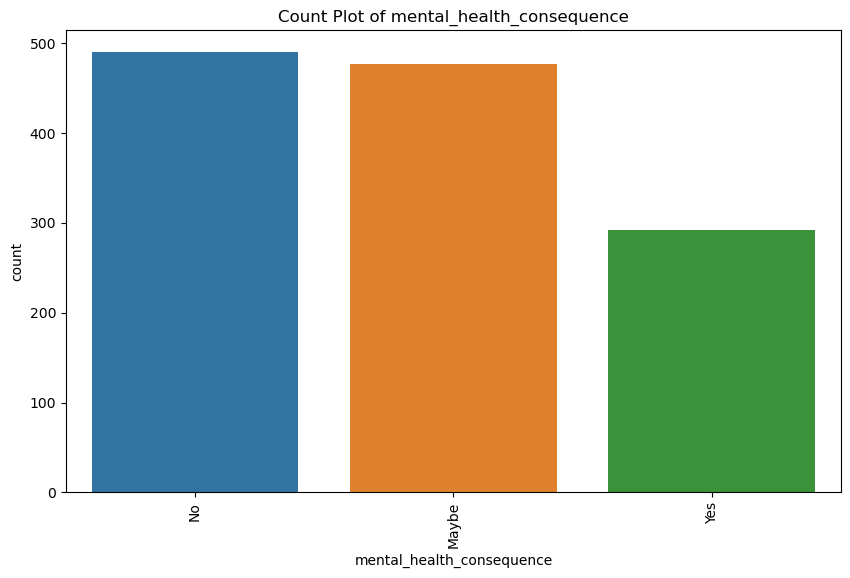

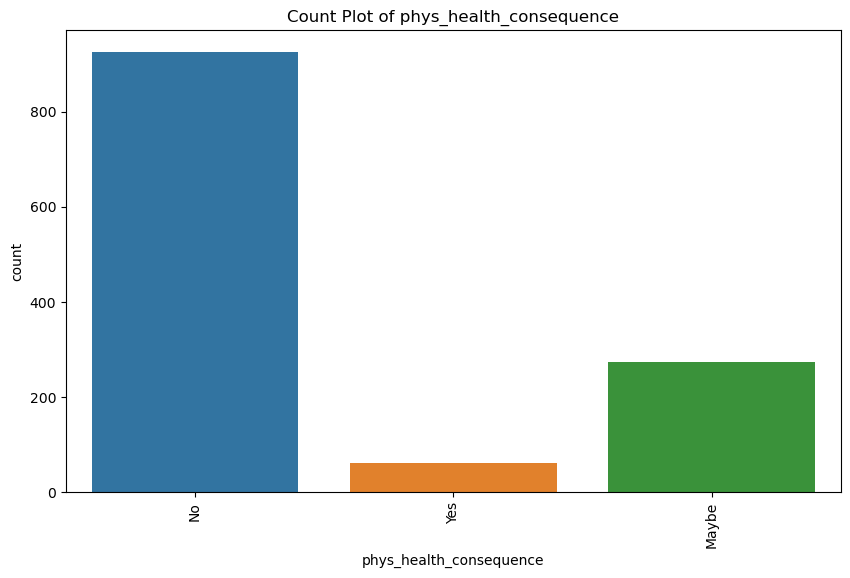

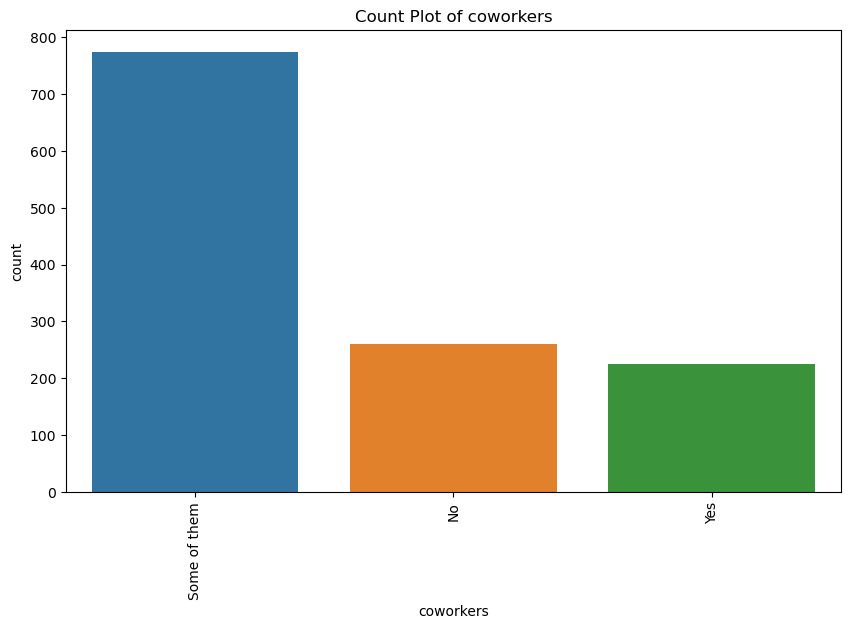

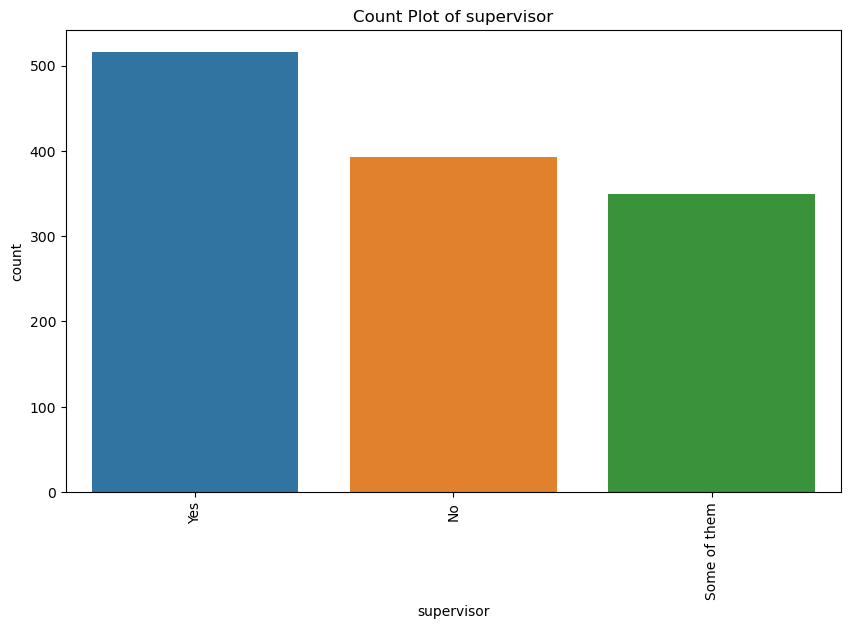

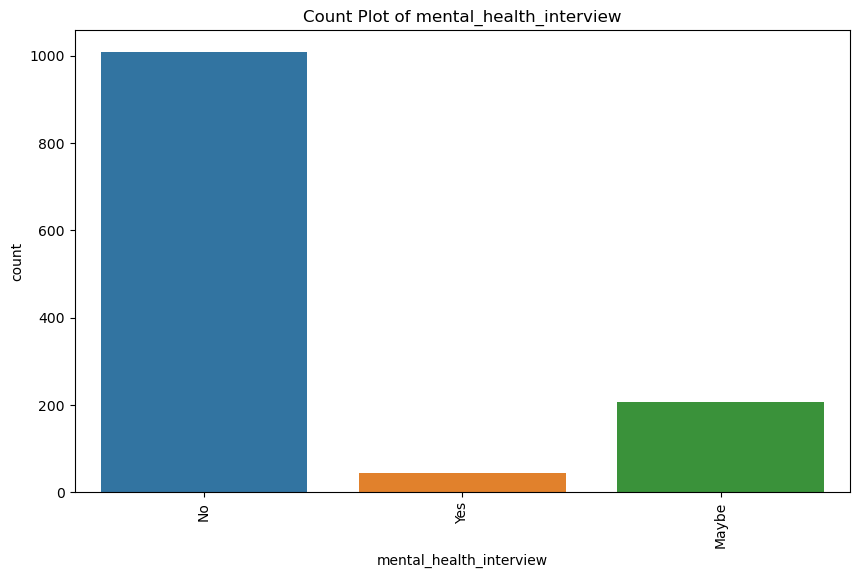

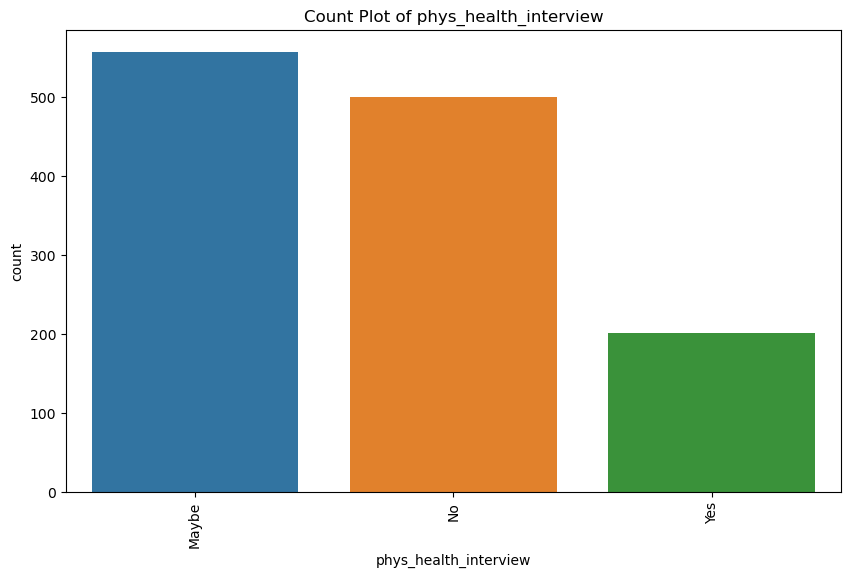

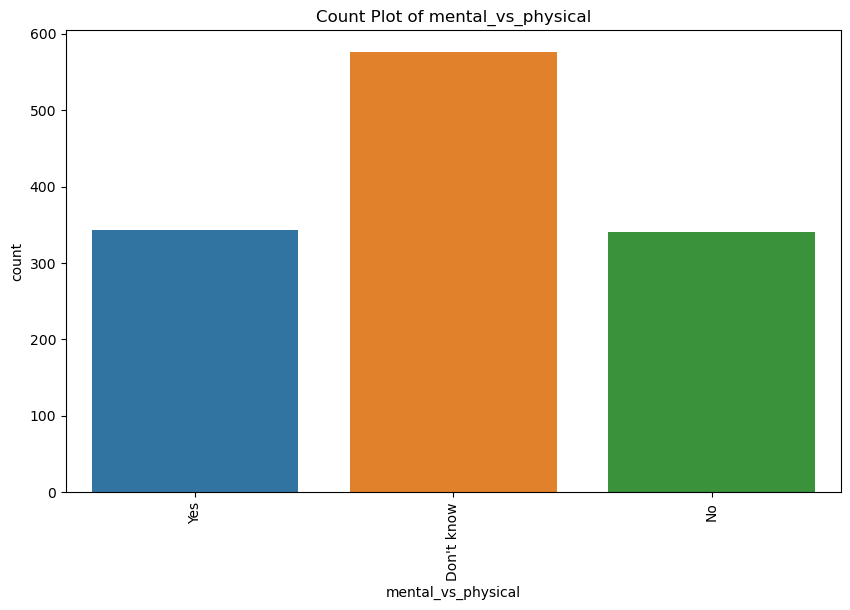

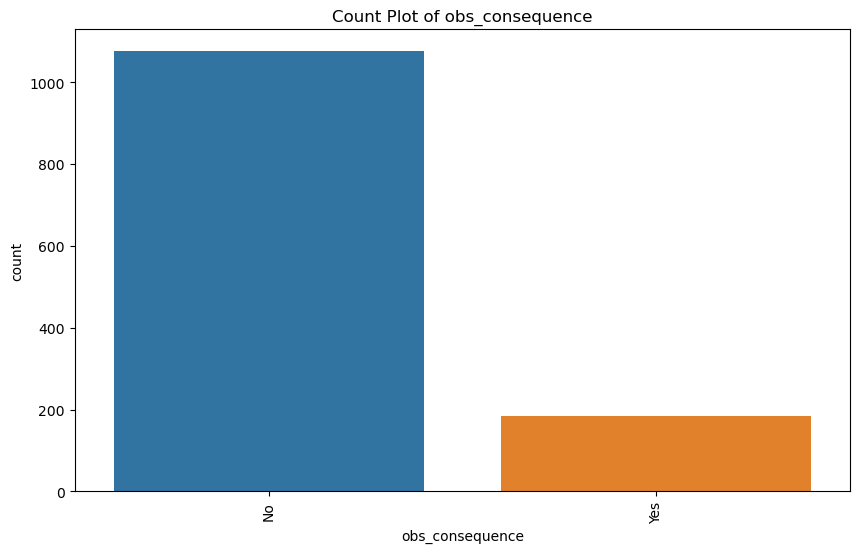

In [15]:
categorical_columns = ['Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 
                       'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 
                       'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
                       'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 
                       'obs_consequence']

# Plotting count plots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)
    plt.show()


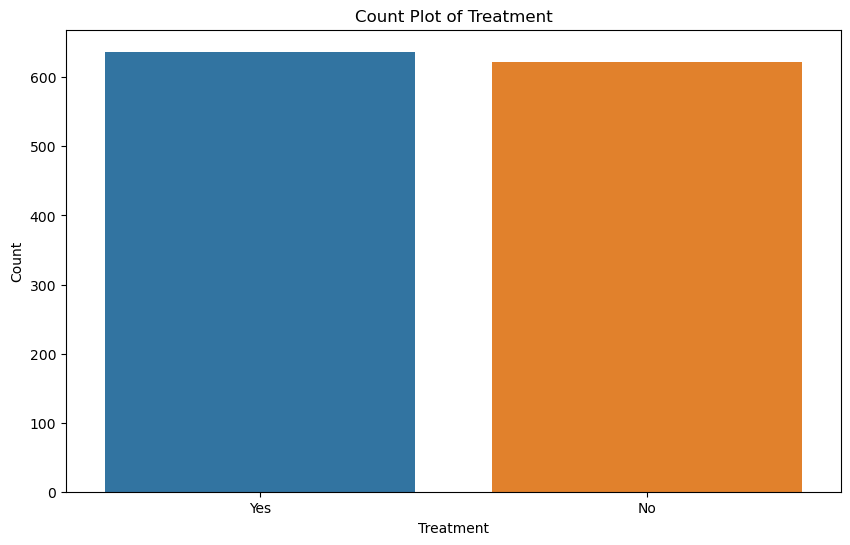

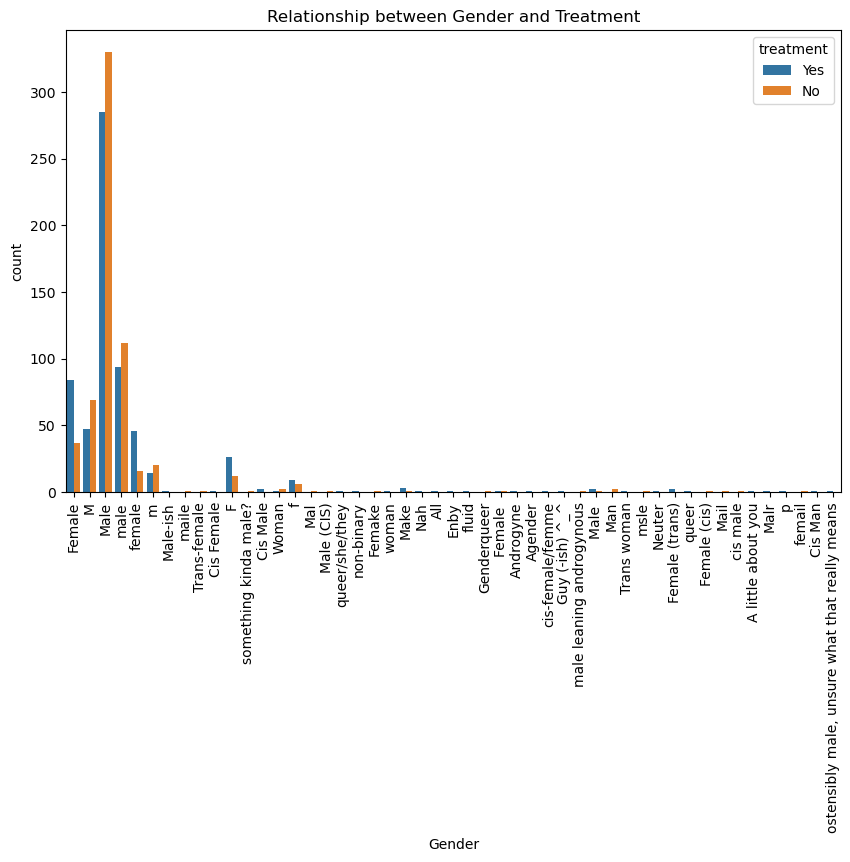

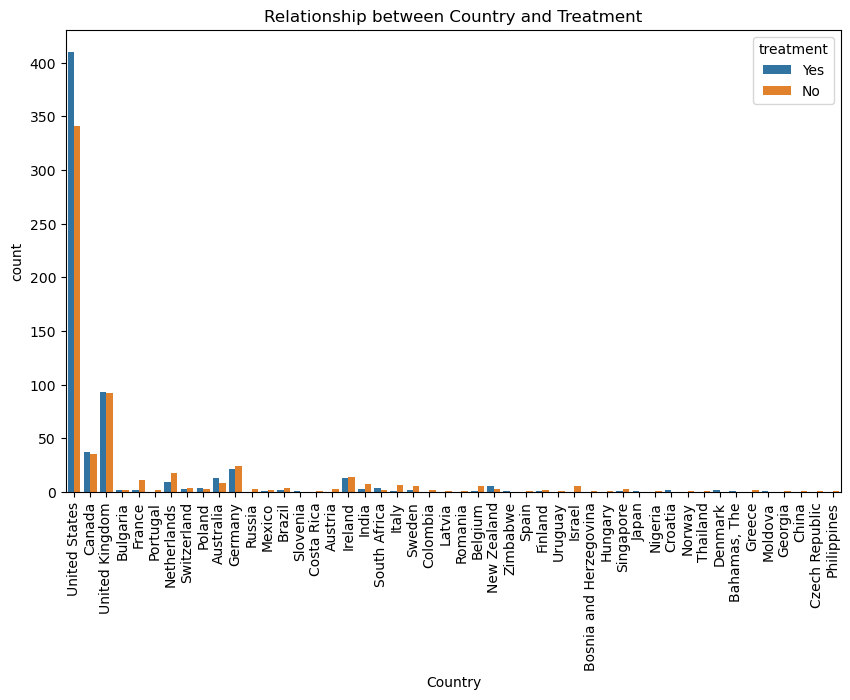

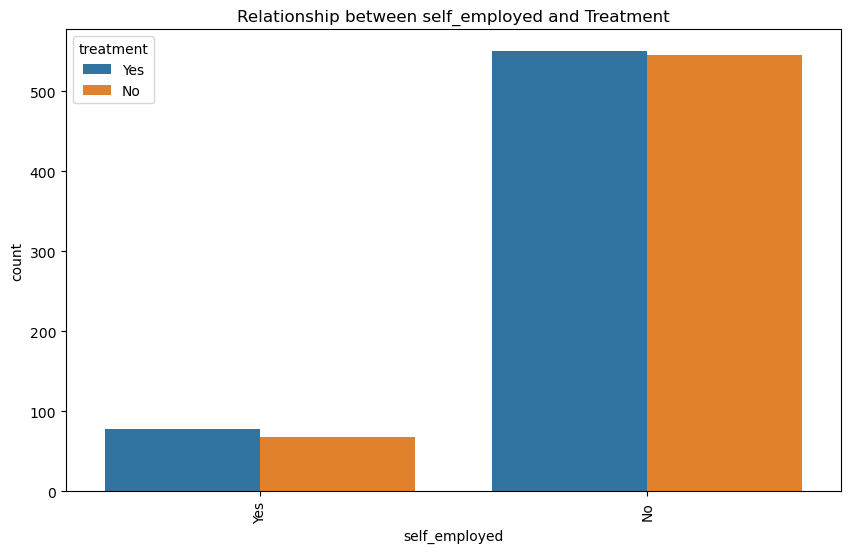

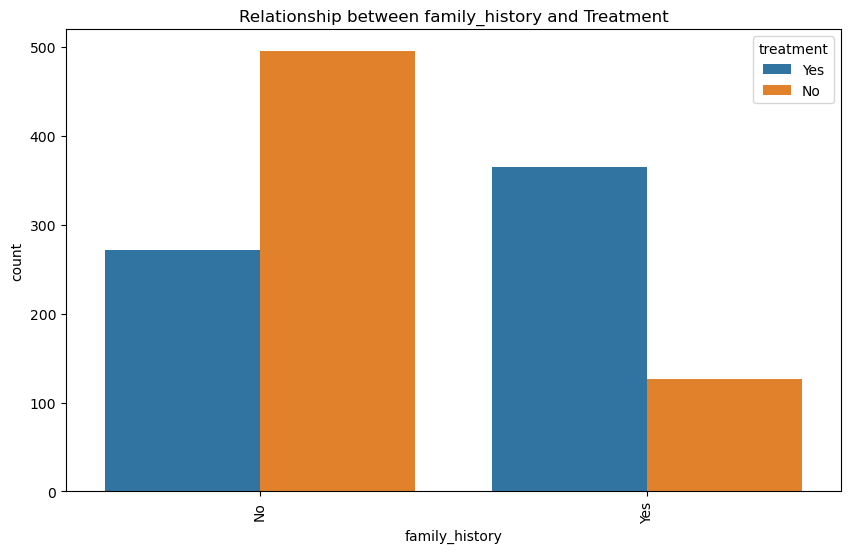

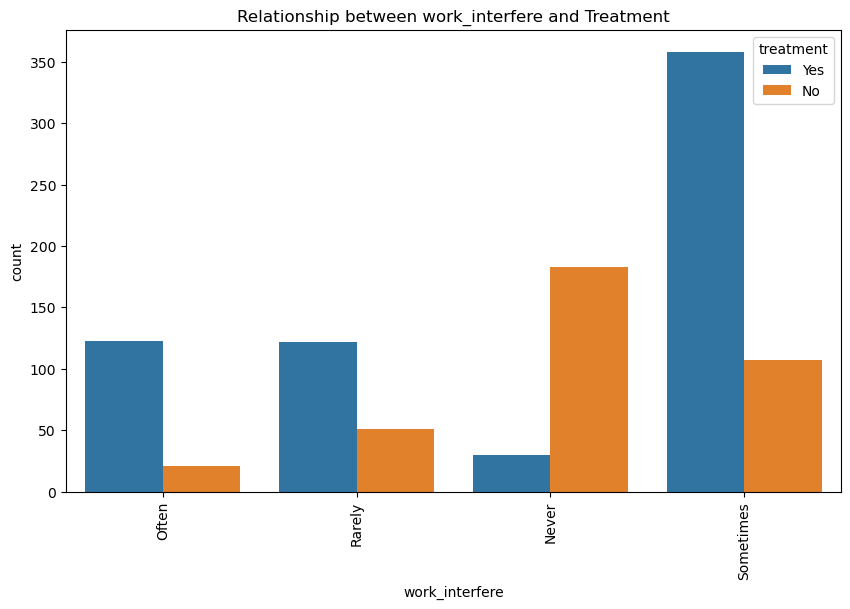

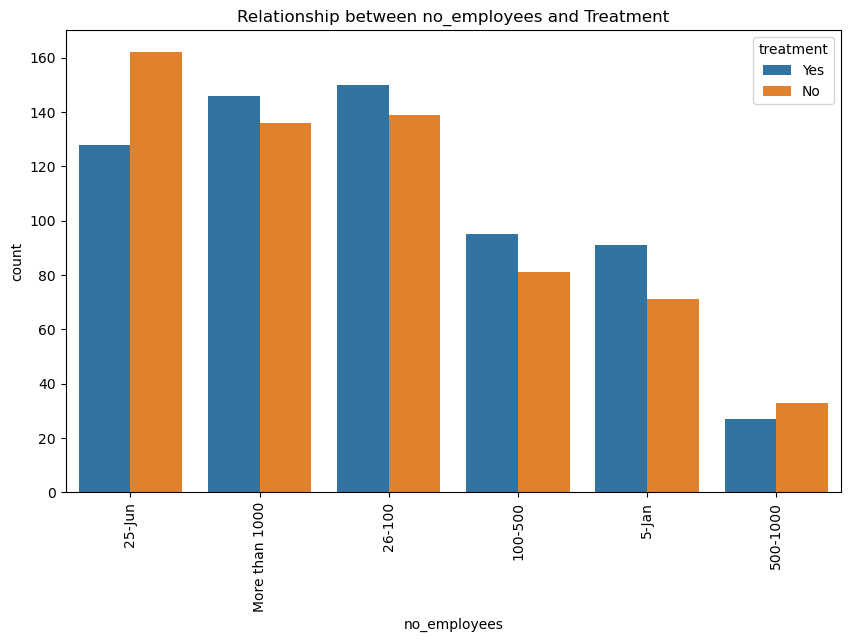

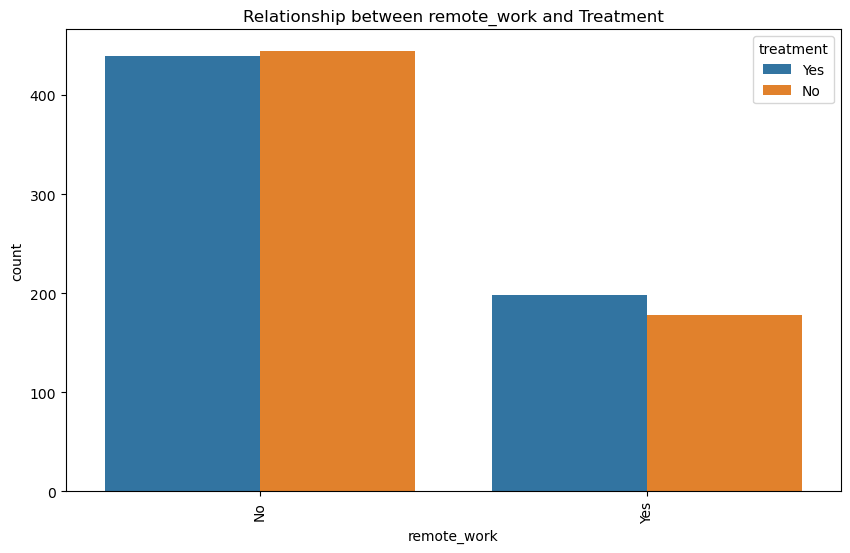

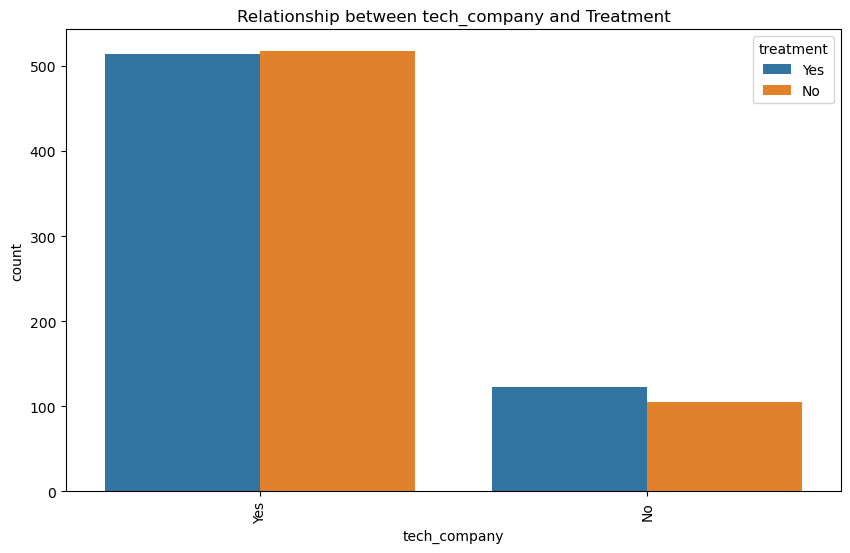

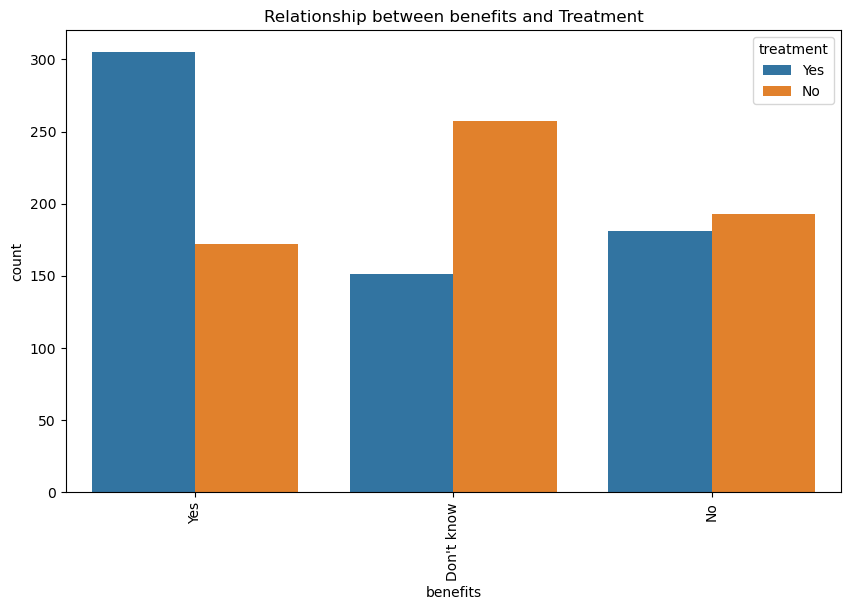

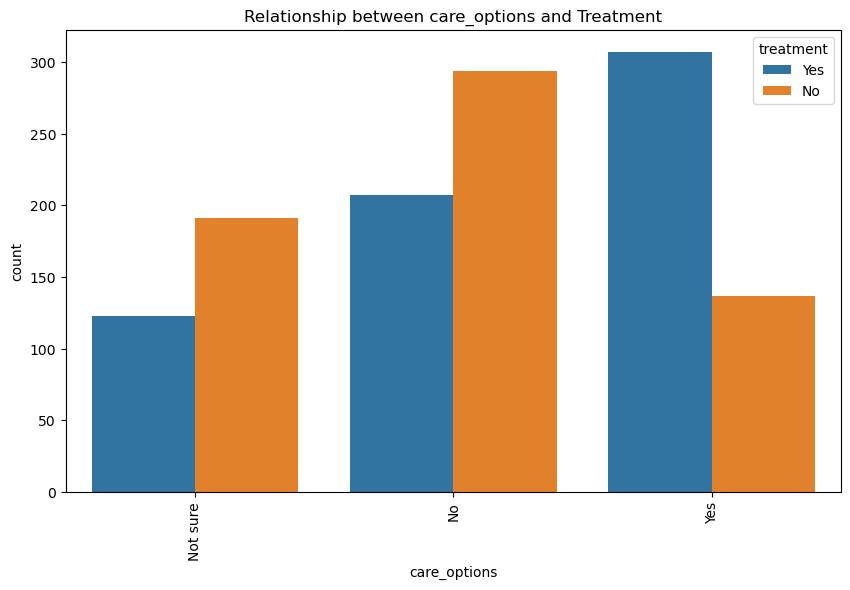

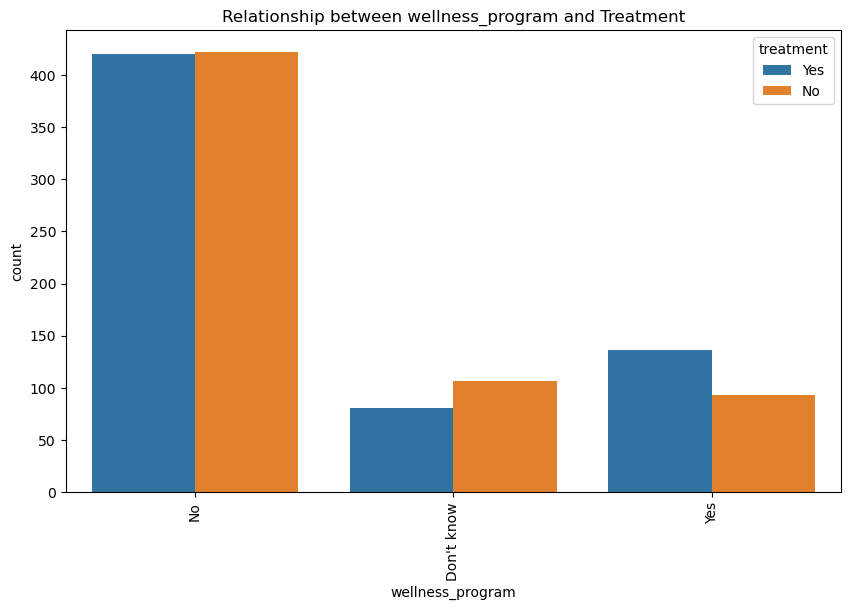

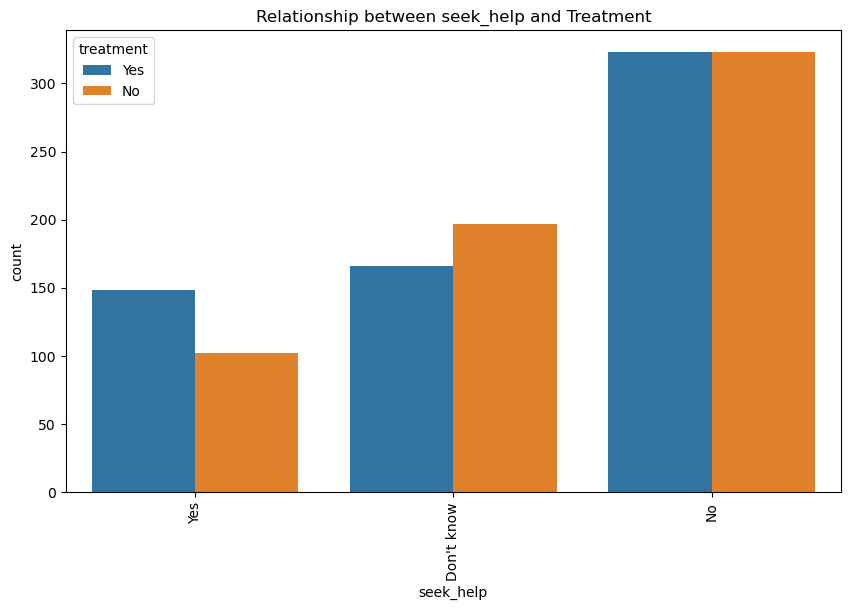

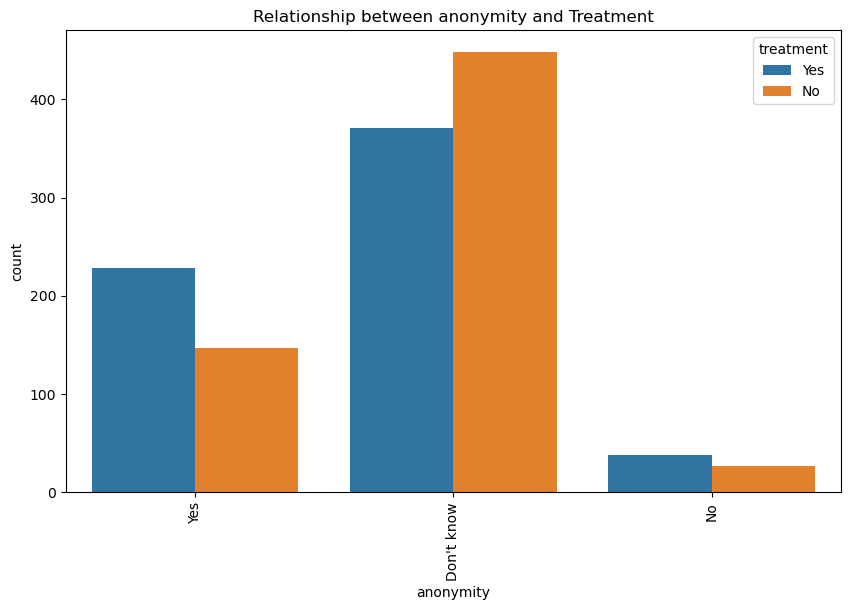

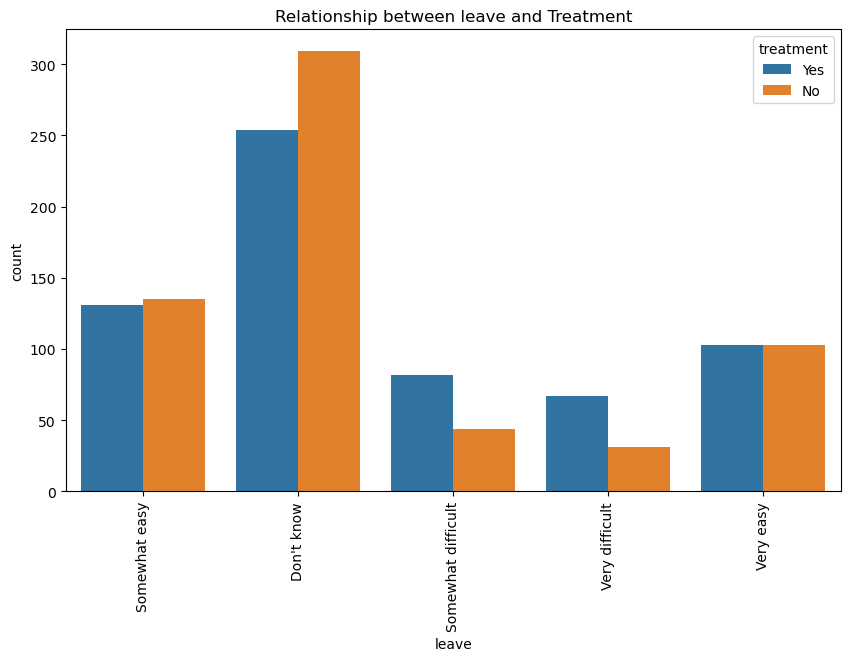

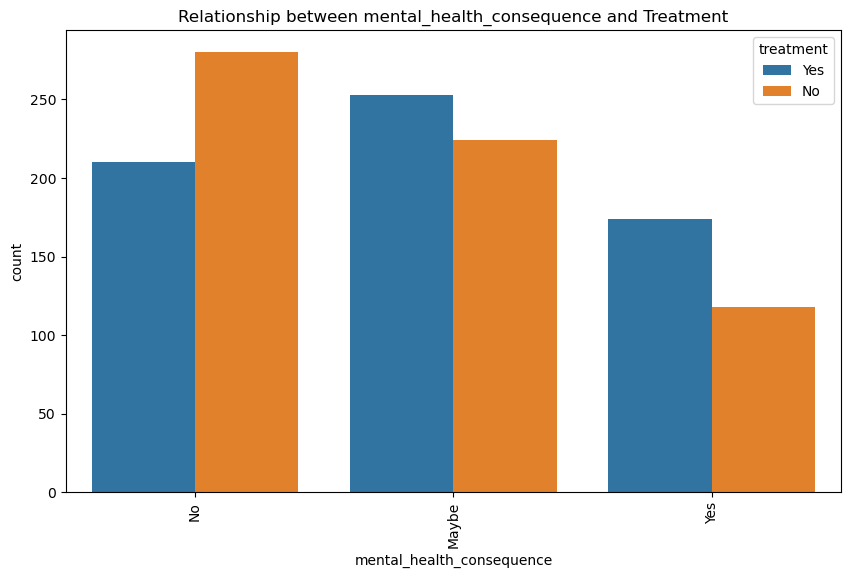

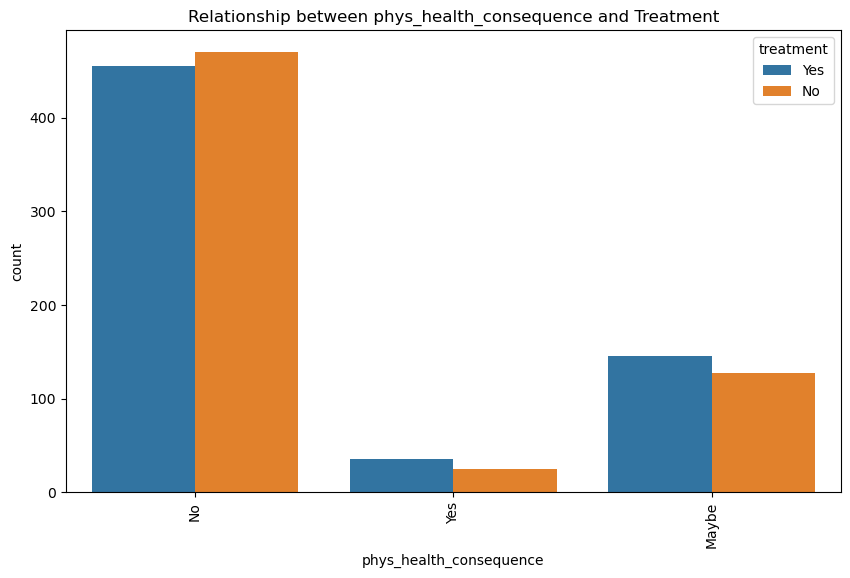

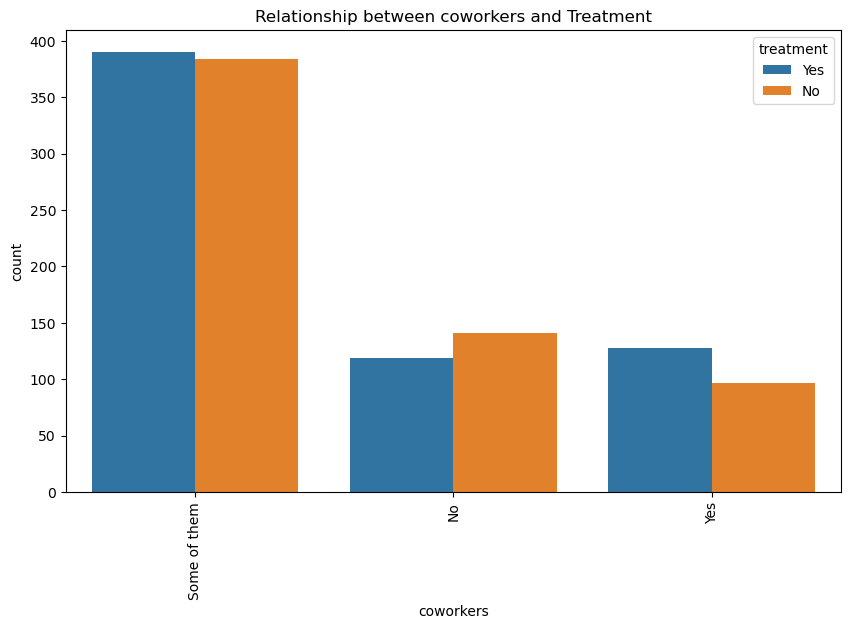

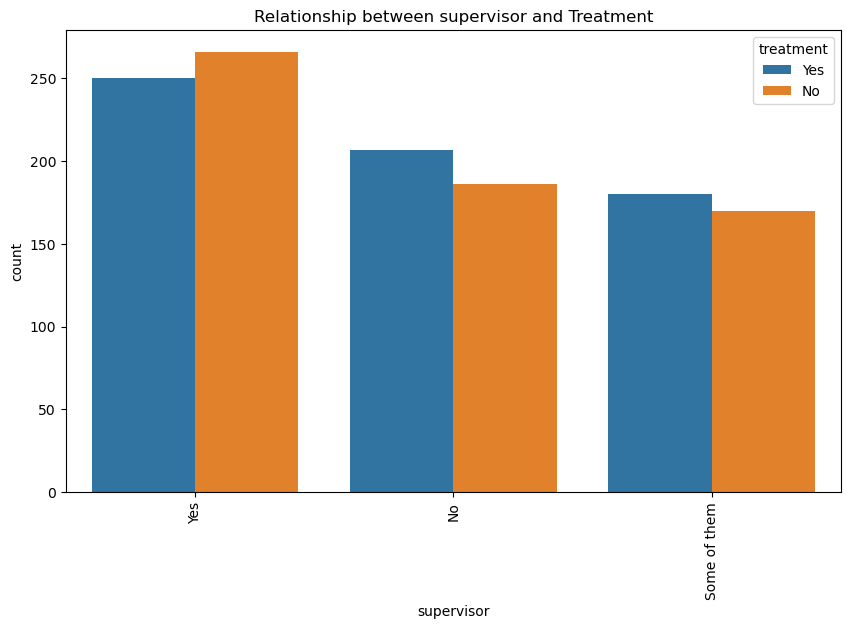

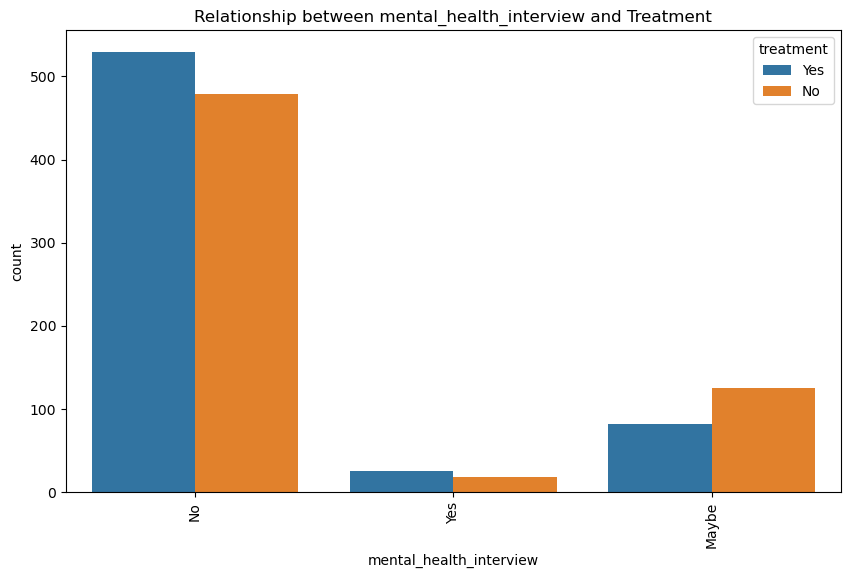

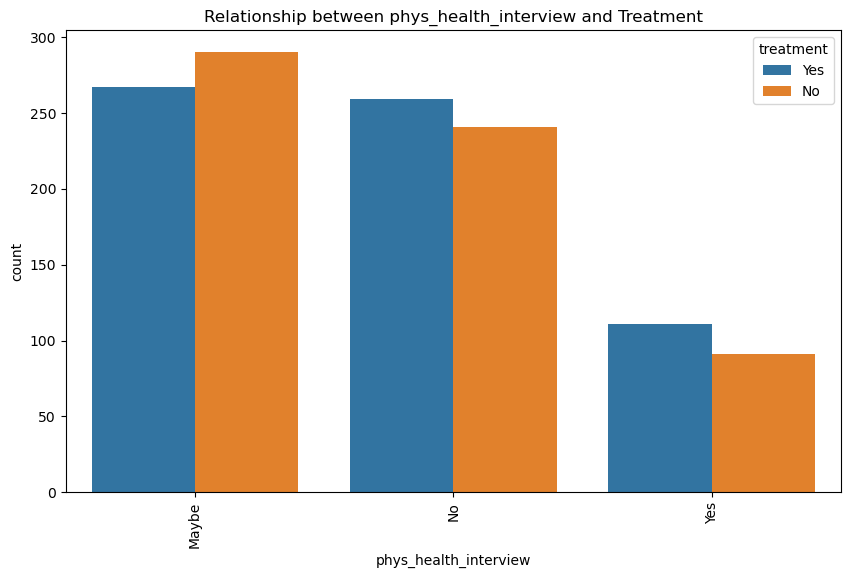

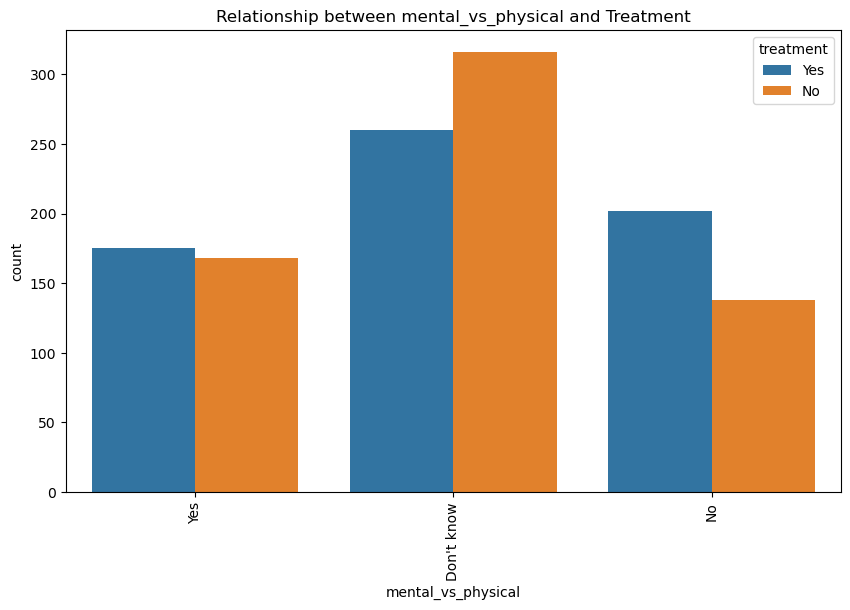

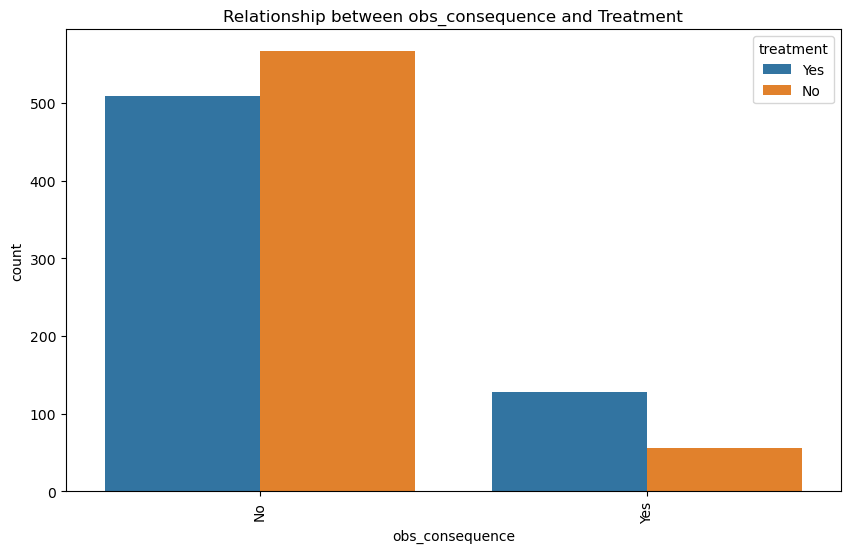

In [17]:
# Count plot of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='treatment')
plt.title('Count Plot of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

# Relationship between treatment and other variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue='treatment')
    plt.title(f'Relationship between {column} and Treatment')
    plt.xticks(rotation=90)
    plt.show()

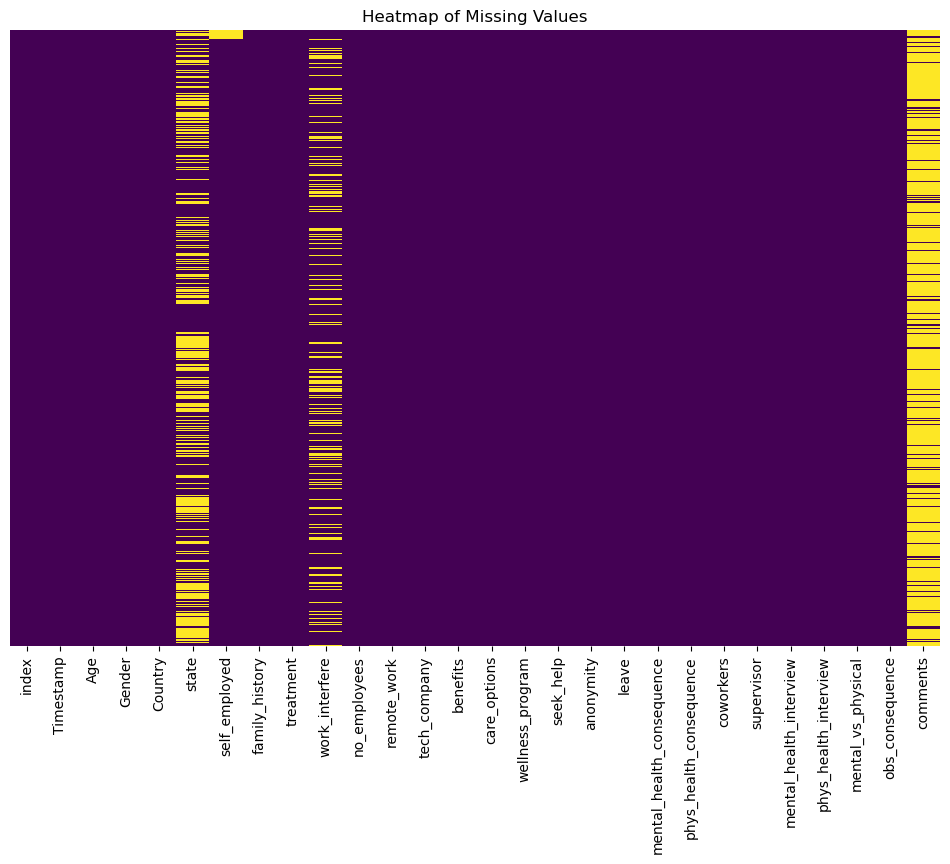

In [18]:
# Heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [19]:
# Calculate the percentage of missing data for each column
missing_data_percent = data.isnull().mean() * 100

# Create a DataFrame to display the results
missing_data_df = pd.DataFrame(missing_data_percent, columns=['Percentage of Missing Data'])

# Sort the DataFrame by the percentage of missing data in descending order
missing_data_df.sort_values(by='Percentage of Missing Data', ascending=False, inplace=True)

# Display the DataFrame
print(missing_data_df)

                           Percentage of Missing Data
comments                                    86.973789
state                                       40.905481
work_interfere                              20.969023
self_employed                                1.429706
seek_help                                    0.000000
obs_consequence                              0.000000
mental_vs_physical                           0.000000
phys_health_interview                        0.000000
mental_health_interview                      0.000000
supervisor                                   0.000000
coworkers                                    0.000000
phys_health_consequence                      0.000000
mental_health_consequence                    0.000000
leave                                        0.000000
anonymity                                    0.000000
index                                        0.000000
wellness_program                             0.000000
Timestamp                   

Data Cleaning

In [20]:
# Handle missing values
data.dropna(inplace=True)

Building a Logistic Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
# Select relevant features and target variable
features = data[['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees',
                 'remote_work', 'tech_company', 'benefits', 'care_options', 'seek_help', 'anonymity',
                 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
                 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']]
target = data['treatment']

In [23]:
# Encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the data (optional, but can improve performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], features.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print(coefficients)

                               Coefficient
work_interfere_Sometimes          0.940105
family_history_Yes                0.884710
anonymity_Yes                     0.666335
care_options_Yes                  0.516399
seek_help_No                      0.499129
benefits_Yes                      0.437428
leave_Somewhat difficult          0.427396
Gender_F                          0.405997
benefits_No                       0.383668
phys_health_interview_Yes         0.383230
Gender_female                     0.321872
Gender_M                          0.277794
leave_Very easy                   0.274462
coworkers_Some of them            0.258864
no_employees_25-Jun               0.256369
Gender_Female                     0.242687
work_interfere_Often              0.223256
anonymity_No                      0.215062
leave_Very difficult              0.198151
Gender_f                          0.194866
Gender_male                       0.181490
coworkers_Yes                     0.181302
remote_work

<Figure size 1400x1200 with 0 Axes>

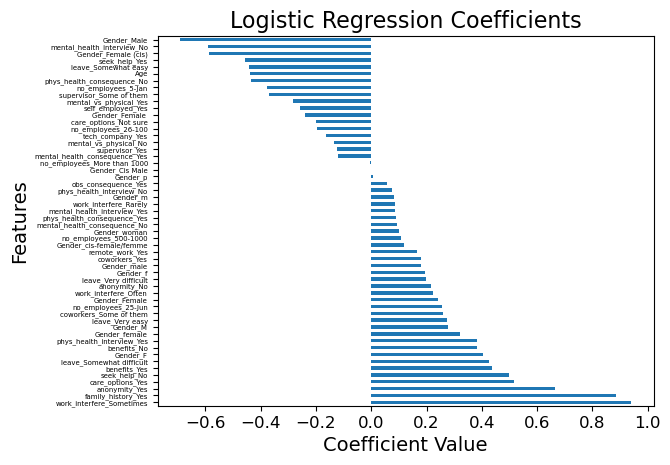

In [31]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust font size
plt.figure(figsize=(14, 12))
coefficients.plot(kind='barh', legend=False)
plt.title('Logistic Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate the y-axis labels
plt.yticks(fontsize=5)
plt.xticks(fontsize=12)
plt.show()


Confusion Matrix:
 [[ 2  5]
 [ 2 17]]
Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.29      0.36         7
         Yes       0.77      0.89      0.83        19

    accuracy                           0.73        26
   macro avg       0.64      0.59      0.60        26
weighted avg       0.70      0.73      0.70        26

Accuracy Score: 0.7307692307692307


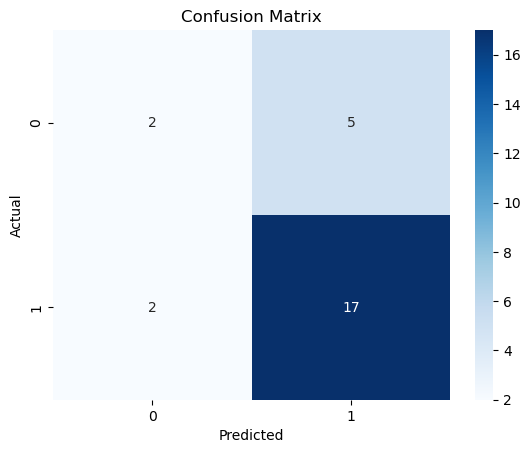

In [32]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_log_reg = LogisticRegression(**best_params, max_iter=1000)
best_log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred_best = best_log_reg.predict(X_test)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

# Classification Report
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report:\n", class_report_best)

# Accuracy Score
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy Score:", accuracy_best)

Best parameters: {'C': 0.1, 'solver': 'newton-cg'}
Confusion Matrix:
 [[ 1  6]
 [ 1 18]]
Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.14      0.22         7
         Yes       0.75      0.95      0.84        19

    accuracy                           0.73        26
   macro avg       0.62      0.55      0.53        26
weighted avg       0.68      0.73      0.67        26

Accuracy Score: 0.7307692307692307


In [35]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(log_reg, features, target, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.88888889 0.82352941 0.82352941 0.82352941 0.82352941]
Mean cross-validation score: 0.8366013071895424


<Figure size 1400x1200 with 0 Axes>

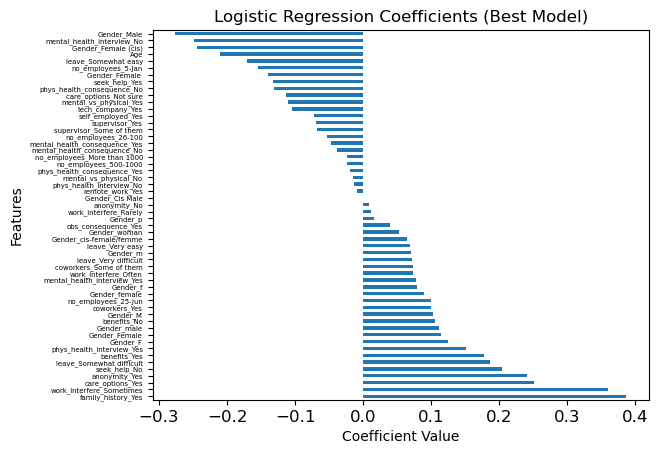

In [37]:
import matplotlib.pyplot as plt

# Plot the coefficients of the best model
coefficients_best = pd.DataFrame(best_log_reg.coef_[0], features.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(14, 12))
coefficients_best.plot(kind='barh', legend=False)
plt.yticks(fontsize=5)
plt.xticks(fontsize=12)
plt.title('Logistic Regression Coefficients (Best Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()